In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# CNN keras
import tensorflow
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the train set with labels --> the mnist numbers dataset
# One row is on image

df = pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Divide the train set into data and labels sets

X_train = df.iloc[:,1:786]
y_train = df.iloc[:,0]
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


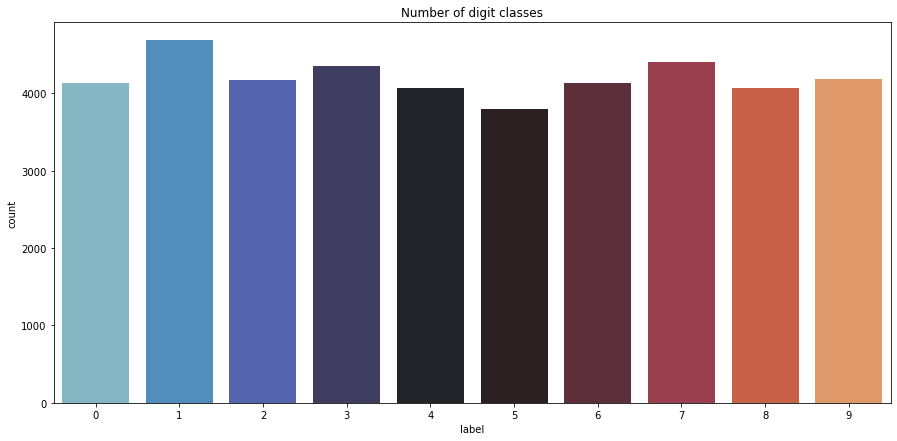

In [4]:
# Alt1
# Plot the distribution of labels (classes)
# The classes is somewhat equaly distributed

plt.figure(figsize=(15,7))
sns.countplot(y_train, palette='icefire')
plt.title('Number of digit classes')
plt.show()

# Alt 2
# y_train.value_counts()

(784,)
(28, 28)


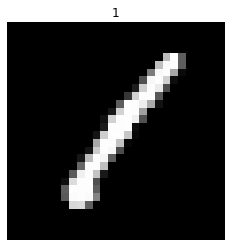

In [5]:
# View one of the images in the training set
# Must reshape the image to view it

image = X_train.iloc[0].to_numpy()
print(image.shape)
image = image.reshape(28,28)
print(image.shape)

plt.imshow(image, cmap='gray')
plt.title(df.iloc[0,0])
plt.axis("off")
plt.show()


(784,)
(28, 28)


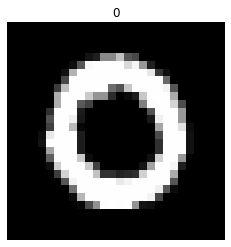

In [6]:
# View another image

image = X_train.iloc[1].to_numpy()
print(image.shape)
image = image.reshape(28,28)
print(image.shape)

plt.imshow(image, cmap='gray')
plt.title(df.iloc[1,0])
plt.axis("off")
plt.show()

In [7]:
# Load the test set

X_test = pd.read_csv('test.csv')

# Normalization of the train and the test sets

X_test = X_test / 255
X_train = X_train / 255


In [8]:
# Reshape both the train and test sets to to fit a CNN

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [9]:
# One hot encoding the labels of the training set

y_train = to_categorical(y_train, num_classes = 10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
# Split the training data into a training and a validation set
# We must have validation set during the training of the CNN

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


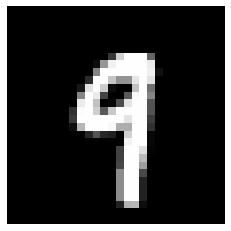

In [11]:
# View one of the images in the training set
# After reshape we now acces the data differently
# Index 2, containing an image 9, represented as a matix, select all rows and columns and channel 0

plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.axis('off')
plt.show()

In [12]:
# CNN model setup

# CNN
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation= 'relu', 
                 input_shape = (28,28,1), padding = 'Same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation= 'relu', 
                 padding = 'Same'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

# Classification, fully connected 
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [13]:
# Compile the model

model.compile(optimizer = Adam(lr = 0.001 , beta_1 = 0.9, beta_2 = 0.999),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [14]:
# Defining nbr of epochs and batch_size for training

epochs = 10
batch_size = 250

In [15]:
# Data augmentation; move and rotate the data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [16]:
steps_per_epoch = X_train.shape[0] / batch_size
print(steps_per_epoch)

151.2


In [17]:
# Callbacks, save the best model during training

model_save_path = 'bestCNNmodel.h5'

callback_list = [ModelCheckpoint(
                filepath = model_save_path,
                monitor = 'val_loss',
                save_best_only = True)]                               

In [18]:
# Train the CNN model

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (X_val, y_val), steps_per_epoch = steps_per_epoch,
                              callbacks = callback_list
                             )


Epoch 1/10
151/151 [==============================] - 22s 131ms/step - loss: 1.5910 - accuracy: 0.4486 - val_loss: 0.2473 - val_accuracy: 0.9340
Epoch 2/10
151/151 [==============================] - 18s 110ms/step - loss: 0.5267 - accuracy: 0.8305 - val_loss: 0.1278 - val_accuracy: 0.9629
Epoch 3/10
151/151 [==============================] - 18s 113ms/step - loss: 0.3266 - accuracy: 0.8954 - val_loss: 0.1007 - val_accuracy: 0.9714
Epoch 4/10
151/151 [==============================] - 18s 113ms/step - loss: 0.2709 - accuracy: 0.9158 - val_loss: 0.0880 - val_accuracy: 0.9710
Epoch 5/10
151/151 [==============================] - 17s 108ms/step - loss: 0.2435 - accuracy: 0.9259 - val_loss: 0.0718 - val_accuracy: 0.9779
Epoch 6/10
151/151 [==============================] - 17s 106ms/step - loss: 0.2116 - accuracy: 0.9325 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 7/10
151/151 [==============================] - 18s 115ms/step - loss: 0.1903 - accuracy: 0.9412 - val_loss: 0.0578 - val_ac

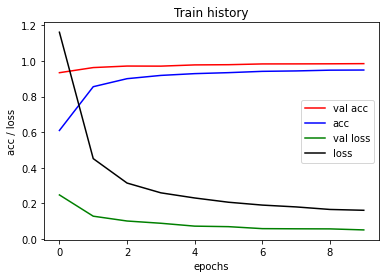

In [19]:
# Plot the training history for accuracy and validation loss
# Access the daata wiht history.history
# Maybe dropout makes it harder during train then for validation. Might explain
# why acc < val_acc

plt.plot(history.history['val_accuracy'], color = 'red', label = "val acc")
plt.plot(history.history['accuracy'], color = 'blue', label = "acc")
plt.plot(history.history['val_loss'], color = 'green', label = "val loss")
plt.plot(history.history['loss'], color = 'black', label = "loss")
plt.ylabel('acc / loss')
plt.xlabel('epochs')
plt.title('Train history')
plt.legend()

plt.show()


In [20]:
# Load the best saved model

best_model = load_model(model_save_path)

In [21]:
# Make predictions on the validation set

y_pred = best_model.predict(X_val)

# np.argmax() will return the index of the array where the values was the highest

y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)

In [22]:
# See the result in a confusion matrix

cm = confusion_matrix(y_true, y_pred_classes)
cm

array([[410,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 480,   1,   2,   0,   0,   0,   0,   2,   0],
       [  1,   1, 396,   0,   0,   0,   0,   4,   0,   1],
       [  1,   0,   2, 409,   0,   3,   0,   0,   2,   1],
       [  0,   2,   0,   0, 455,   0,   1,   0,   0,   3],
       [  0,   0,   0,   3,   0, 365,   1,   0,   2,   1],
       [  4,   2,   0,   0,   0,   1, 405,   0,   1,   0],
       [  0,   1,   1,   0,   0,   0,   0, 444,   0,   0],
       [  0,   3,   1,   0,   2,   0,   0,   0, 375,   1],
       [  1,   2,   0,   1,   4,   0,   0,   3,   0, 398]], dtype=int64)

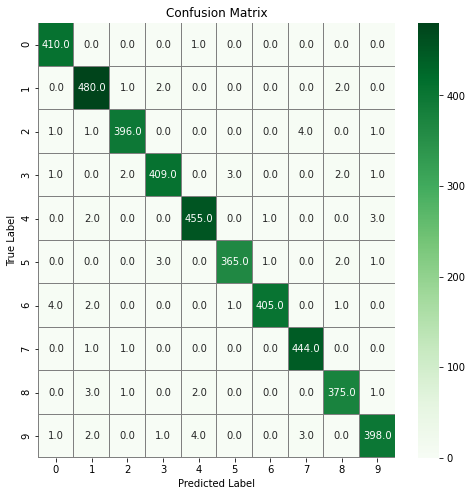

In [23]:
# plot the confusion matrix

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
# Classification report
# Target_names must be a be strings in a list

# Alt 1
target_list = [str(x) for x in np.arange(0,10)]

# Alt 2 
# target_list = ["0","1","2","3","4","5","6","7","8","9"]

# Create the classification report
# Accuracy and f1 -scores are high ~ 0.98

print(classification_report(y_true, y_pred_classes, target_names = target_list))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       0.98      0.99      0.98       485
           2       0.99      0.98      0.99       403
           3       0.99      0.98      0.98       418
           4       0.98      0.99      0.99       461
           5       0.99      0.98      0.99       372
           6       1.00      0.98      0.99       413
           7       0.98      1.00      0.99       446
           8       0.98      0.98      0.98       382
           9       0.98      0.97      0.98       409

    accuracy                           0.98      4200
   macro avg       0.99      0.98      0.98      4200
weighted avg       0.99      0.98      0.98      4200



In [25]:
# Predict 28 000 images from the test set

y_test_pred = best_model.predict(X_test)

[4.0851657e-07 3.8078369e-07 9.9969494e-01 1.4252335e-04 1.8090983e-08
 8.0807090e-11 8.6863883e-10 1.6173764e-04 3.3690277e-08 7.8484454e-09]
2


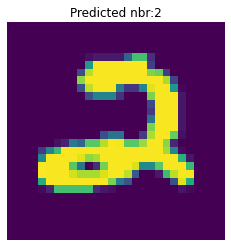

In [26]:
# Look at the image at index 0 in the test set

image = X_test[0] 

# Look at the prediction of that image
# since 1 dim, axis = 1, not needed
# I can see that the probalibilty is the highest at index 2
# so its predicted as a number 2

print(y_test_pred[0])
print(np.argmax(y_test_pred[0]))

# Plot the image to verify
# Its a number 2, the prediction was correct

pred_nbr = np.argmax(y_test_pred[0])
plt.imshow(image)
plt.title("Predicted nbr:" + str(pred_nbr))
plt.axis('off')
plt.show()

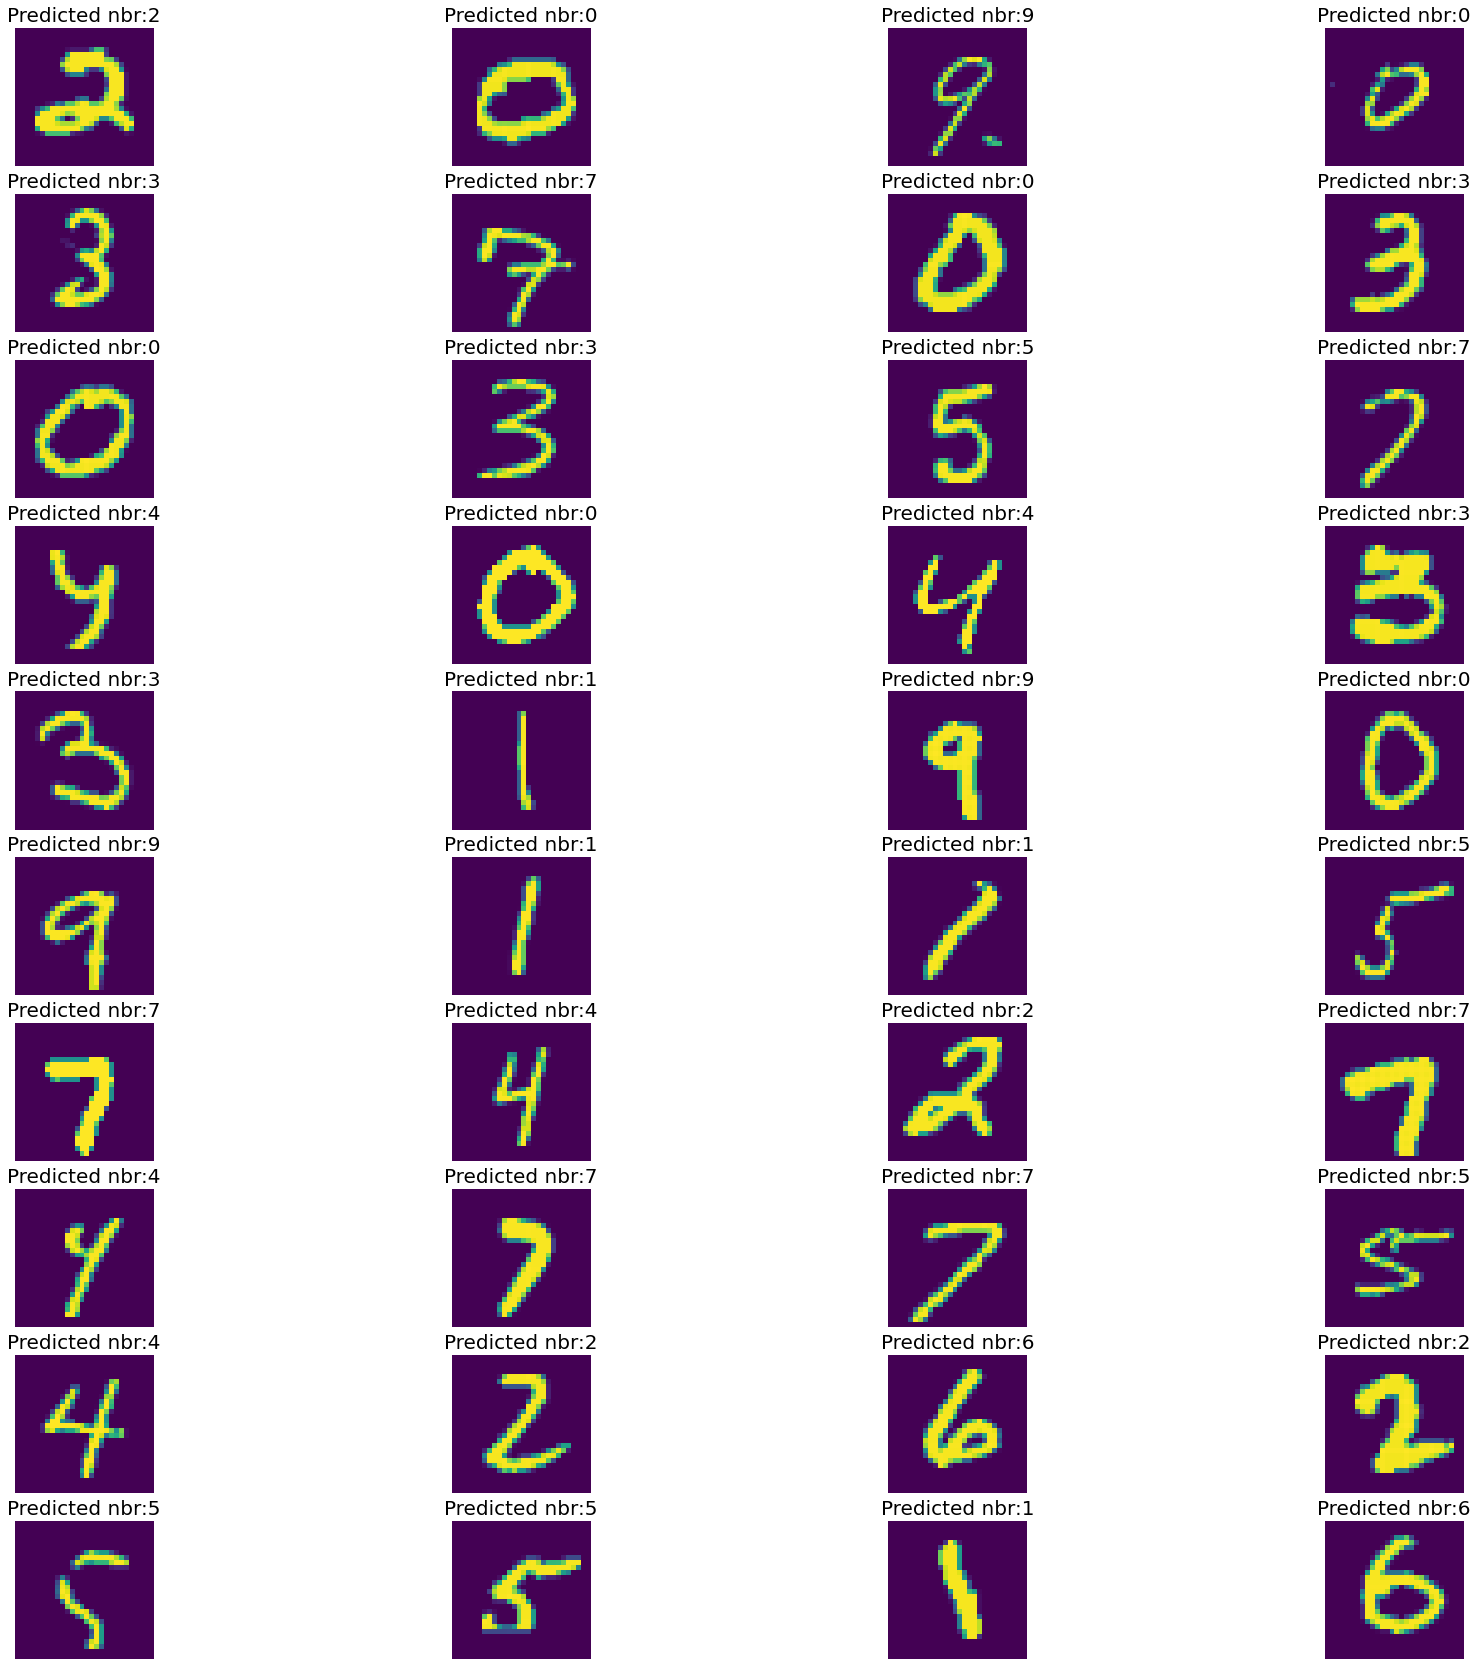

In [27]:
# Plot 40 test images and see if they are correct
# Create subplots
# 39 of 40 is correct
   
fig, ax = plt.subplots(10,4,figsize = (30,30))

counter = 0

for i in range(10):
    for j in range(4):
        pred_nbr = np.argmax(y_test_pred[counter])
        ax[i,j].imshow(X_test[counter])
        ax[i,j].set_title("Predicted nbr:" + str(pred_nbr), fontsize= 20)
        ax[i,j].axis('off')
        counter += 1     